**Подключение библиотек и скриптов**

In [619]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score as r2,mean_absolute_error as mae,mean_squared_error as mse

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

%matplotlib inline

**Пути к директориям и файлам**

In [620]:
train_path = "C:/Users/Laptop/project_task/train.csv"

test_path = "C:/Users/Laptop/project_task/test.csv"

### Загрузка данных

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [621]:
df = pd.read_csv(train_path)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [622]:
test = pd.read_csv(test_path)
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [623]:
df.shape

(10000, 20)

In [624]:
test.shape

(5000, 19)

### Приведение типов данных

In [625]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [626]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


### Обзор целевой переменной

In [627]:
df.Price.describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

### Обзор количественных переменных

In [628]:
df_num_features = df.select_dtypes(include=['float64', 'int64']).drop(['Price'],axis=1)
df_num_features.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4


In [629]:
test_num_features = test.select_dtypes(include=['float64', 'int64'])
test_num_features.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,11,2748,1,NaN,0,0
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,6,1437,3,NaN,0,2
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,30,7538,87,4702.0,5,5
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,23,4583,3,NaN,3,3
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,2,629,1,NaN,0,0


In [630]:
df_num_features.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


In [631]:
test_num_features.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


### Обзор номинативных переменных

In [632]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


In [633]:
test_obj_features = test.select_dtypes(include='object')
test_obj_features.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,A


In [634]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [635]:
level_map = {'A': 1, 'B': 2}
df['Ecology_2'] = df['Ecology_2'].map(level_map)

In [636]:
test['Ecology_2'] = test['Ecology_2'].map(level_map)

In [637]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [638]:
df['Ecology_3'] = df['Ecology_3'].map(level_map)

In [639]:
test['Ecology_3'] = test['Ecology_3'].map(level_map)

In [640]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [641]:
df['Shops_2'] = df['Shops_2'].map(level_map)

In [642]:
test['Shops_2'] = test['Shops_2'].map(level_map)

In [643]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,2,2,33,7976,5,NaN,0,11,2,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,2,2,46,10309,1,240.0,1,16,2,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,2,2,34,7759,0,229.0,1,3,2,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,2,2,23,5735,3,1084.0,0,5,2,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,2,2,35,5776,1,2078.0,2,4,2,150226.531644


In [644]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,2,2,11,2748,1,NaN,0,0,2
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,2,2,6,1437,3,NaN,0,2,2
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,2,2,30,7538,87,4702.0,5,5,2
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,2,2,23,4583,3,NaN,3,3,2
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,2,2,2,629,1,NaN,0,0,1


### Обработка пропусков

In [645]:
df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

**LifeSquare**

In [646]:
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['LifeSquare'].median()

In [647]:
test.loc[test['LifeSquare'].isnull(), 'LifeSquare'] = test['LifeSquare'].median()

**Healthcare_1**

In [648]:
df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()

In [649]:
test.loc[test['Healthcare_1'].isnull(), 'Healthcare_1'] = test['Healthcare_1'].median()

In [650]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,1.990300,1.972500,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,1.917500,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,1.000000,1.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,1.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,2.000000,2.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,2.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,2.000000,2.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,2.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,2.000000,2.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,2.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,2.000000,2.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,2.000000,633233.466570


In [651]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,35.485549,5.976800,8.632000,12.601000,1984.392600,0.119874,1.990400,1.970200,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800,1.917600
std,4832.674037,44.179466,0.838594,19.092787,15.915345,9.950018,5.483228,6.789213,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365,0.275001
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,1.000000,1.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,4221.750000,21.000000,1.000000,41.906231,25.850152,1.000000,4.000000,9.000000,1973.000000,0.019509,2.000000,2.000000,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,2.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,2.000000,2.000000,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,2.000000
75%,12598.250000,77.000000,2.000000,66.285129,41.769526,9.000000,12.000000,17.000000,2000.000000,0.195781,2.000000,2.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,2.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,2.000000,2.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,2.000000


### Обработка выбросов

**Rooms**

In [652]:
df[df['Rooms'] >= 10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,2,2,74,19083,2,900.0,5,15,2,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,2,2,1,264,0,900.0,0,1,2,78364.616704
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,2,2,25,5648,1,30.0,2,4,2,172329.270863


In [653]:
df.loc[df['Rooms'] >= 10, 'Rooms'] = df['Rooms'].median()

In [654]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.887200,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,1.990300,1.972500,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,1.917500,214138.857399
std,4859.01902,43.587592,0.813844,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,1.000000,1.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,1.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,2.000000,2.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,2.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,2.000000,2.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,2.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,2.000000,2.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,2.000000,249135.462171
max,16798.00000,209.000000,6.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,2.000000,2.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,2.000000,633233.466570


In [655]:
test.loc[test['Rooms'] >= 10, 'Rooms'] = test['Rooms'].median()

In [656]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.907000,56.449500,35.485549,5.976800,8.632000,12.601000,1984.392600,0.119874,1.990400,1.970200,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800,1.917600
std,4832.674037,44.179466,0.810976,19.092787,15.915345,9.950018,5.483228,6.789213,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365,0.275001
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,1.000000,1.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,4221.750000,21.000000,1.000000,41.906231,25.850152,1.000000,4.000000,9.000000,1973.000000,0.019509,2.000000,2.000000,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,2.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,2.000000,2.000000,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,2.000000
75%,12598.250000,77.000000,2.000000,66.285129,41.769526,9.000000,12.000000,17.000000,2000.000000,0.195781,2.000000,2.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,2.000000
max,16795.000000,212.000000,6.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,2.000000,2.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,2.000000


**Square**

In [657]:
df.loc[df['KitchenSquare'] == 2014, 'KitchenSquare'] = df['KitchenSquare'].median()

In [658]:
df.loc[df['KitchenSquare'] == 1970, 'KitchenSquare'] = df['KitchenSquare'].median()

In [659]:
df.loc[(df['KitchenSquare']>df['Square'])] = df['KitchenSquare'].median()

In [660]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8381.381700,50.395100,1.888200,56.309346,36.263396,5.861600,8.526600,12.607900,3.989765e+03,0.120041,1.991100,1.973300,24.685700,5351.494000,8.040400,1026.180100,1.320600,4.232500,1.918300,214112.901799
std,4860.137858,43.591405,0.815823,21.069183,76.610797,5.070426,5.241072,6.776426,2.005003e+05,0.145198,0.113235,0.173177,17.533347,4007.265612,23.831621,746.800108,1.495005,4.806033,0.281128,92912.980417
min,0.000000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,6.000000e+00,0.000000,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,4166.750000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,2.000000,2.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,2.000000,153835.918927
50%,8393.500000,35.500000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,2.000000,2.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,2.000000,192269.644879
75%,12591.250000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,2.000000,2.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,2.000000,249135.462171
max,16798.000000,209.000000,6.000000,641.065193,7480.592129,123.000000,42.000000,117.000000,2.005201e+07,6.000000,6.000000,6.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,6.000000,633233.466570


In [661]:
df.loc[(df['Square']>200)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1981,7917.0,27.0,0.0,212.932361,211.231125,0.0,2.0,3.0,2008.0,0.211401,2.0,2.0,9.0,1892.0,0.0,900.0,0.0,1.0,2.0,302211.260887
1982,5548.0,86.0,5.0,275.645284,233.949309,26.0,12.0,37.0,2011.0,0.161976,2.0,1.0,31.0,7010.0,5.0,4508.0,3.0,7.0,2.0,455264.882666
4262,28.0,9.0,2.0,604.705972,32.781260,1.0,17.0,18.0,1977.0,0.161532,2.0,2.0,25.0,5648.0,1.0,30.0,2.0,4.0,2.0,187717.242538
4690,2307.0,102.0,1.0,409.425181,410.639749,10.0,4.0,4.0,2016.0,0.238617,2.0,2.0,26.0,3889.0,6.0,705.0,3.0,6.0,2.0,90470.430830
6977,11602.0,30.0,2.0,641.065193,638.163193,10.0,20.0,19.0,2019.0,0.000078,2.0,2.0,22.0,6398.0,141.0,1046.0,3.0,23.0,2.0,133529.681562
9910,16568.0,27.0,4.0,200.334539,201.627361,25.0,1.0,2.0,2013.0,0.041116,2.0,2.0,53.0,14892.0,4.0,900.0,1.0,4.0,2.0,528560.506016


## Анализ целевой переменной

In [662]:
import seaborn as sns

In [663]:
target_mean=round(df['Price'].mean(),2)
target_median=df['Price'].median()

target_mean,target_median

(214112.9, 192269.64487934904)

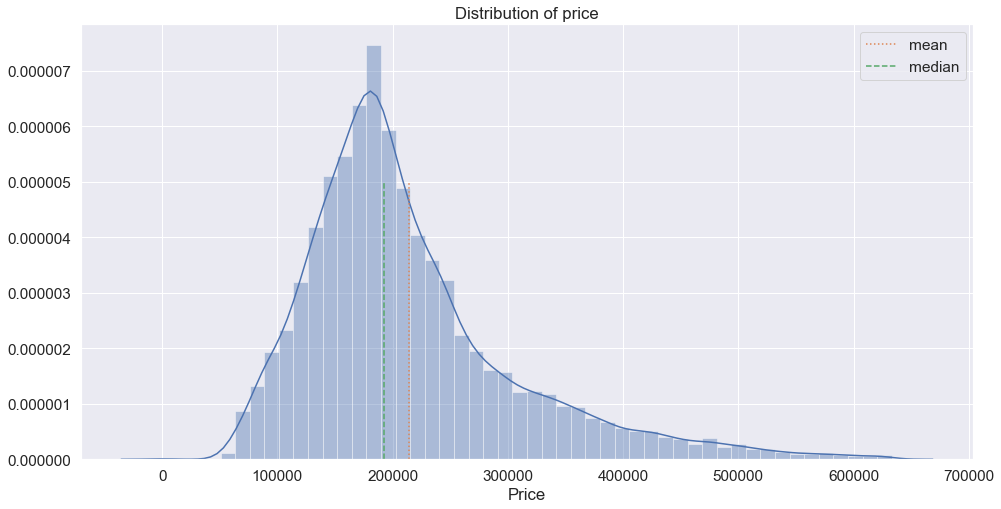

In [664]:
plt.figure(figsize=(16,8))
sns.distplot(df['Price'])

y=np.linspace(0,0.000005,100)
plt.plot([target_mean]*100,y,label='mean',linestyle=':')
plt.plot([target_median]*100,y,label='median',linestyle='--')

plt.title('Distribution of price')
plt.legend()
plt.show()

## Оценка распределения целевой переменной в разрезе других признаков

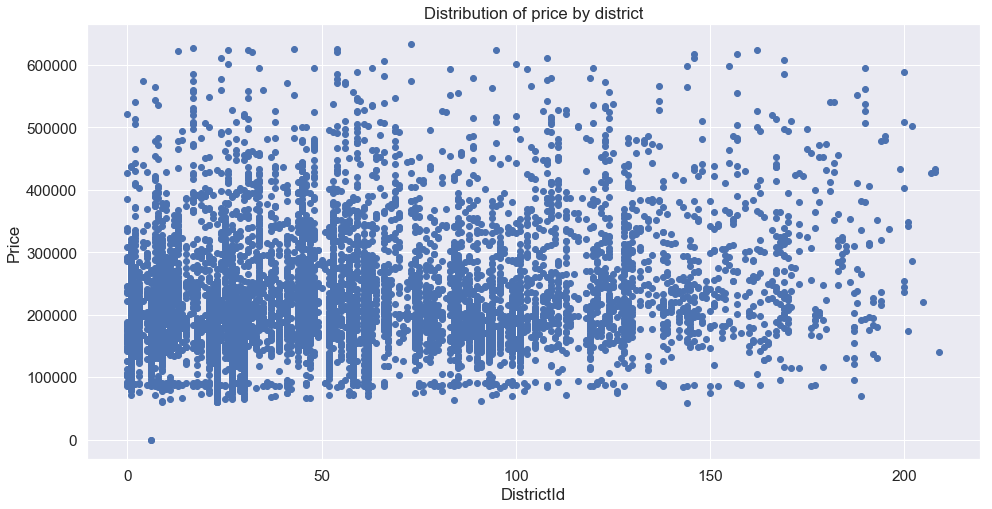

In [665]:
plt.figure(figsize=(16,8))
plt.scatter(df['DistrictId'],df['Price'])

plt.xlabel('DistrictId')
plt.ylabel('Price')
plt.title('Distribution of price by district')
plt.show()

In [666]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038.0,35.0,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,2.0,2.0,33.0,7976.0,5.0,900.0,0.0,11.0,2.0,184966.930730
1,15053.0,41.0,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,2.0,2.0,46.0,10309.0,1.0,240.0,1.0,16.0,2.0,300009.450063
2,4765.0,53.0,2.0,44.947953,29.197612,0.0,8.0,12.0,1968.0,0.049637,2.0,2.0,34.0,7759.0,0.0,229.0,1.0,3.0,2.0,220925.908524
3,5809.0,58.0,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,2.0,2.0,23.0,5735.0,3.0,1084.0,0.0,5.0,2.0,175616.227217
4,10783.0,99.0,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,2.0,2.0,35.0,5776.0,1.0,2078.0,2.0,4.0,2.0,150226.531644


In [667]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8381.381700,50.395100,1.888200,56.309346,36.263396,5.861600,8.526600,12.607900,3.989765e+03,0.120041,1.991100,1.973300,24.685700,5351.494000,8.040400,1026.180100,1.320600,4.232500,1.918300,214112.901799
std,4860.137858,43.591405,0.815823,21.069183,76.610797,5.070426,5.241072,6.776426,2.005003e+05,0.145198,0.113235,0.173177,17.533347,4007.265612,23.831621,746.800108,1.495005,4.806033,0.281128,92912.980417
min,0.000000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,6.000000e+00,0.000000,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,4166.750000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,2.000000,2.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,2.000000,153835.918927
50%,8393.500000,35.500000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,2.000000,2.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,2.000000,192269.644879
75%,12591.250000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,2.000000,2.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,2.000000,249135.462171
max,16798.000000,209.000000,6.000000,641.065193,7480.592129,123.000000,42.000000,117.000000,2.005201e+07,6.000000,6.000000,6.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,6.000000,633233.466570


## Анализ признаков

### Количественные признаки

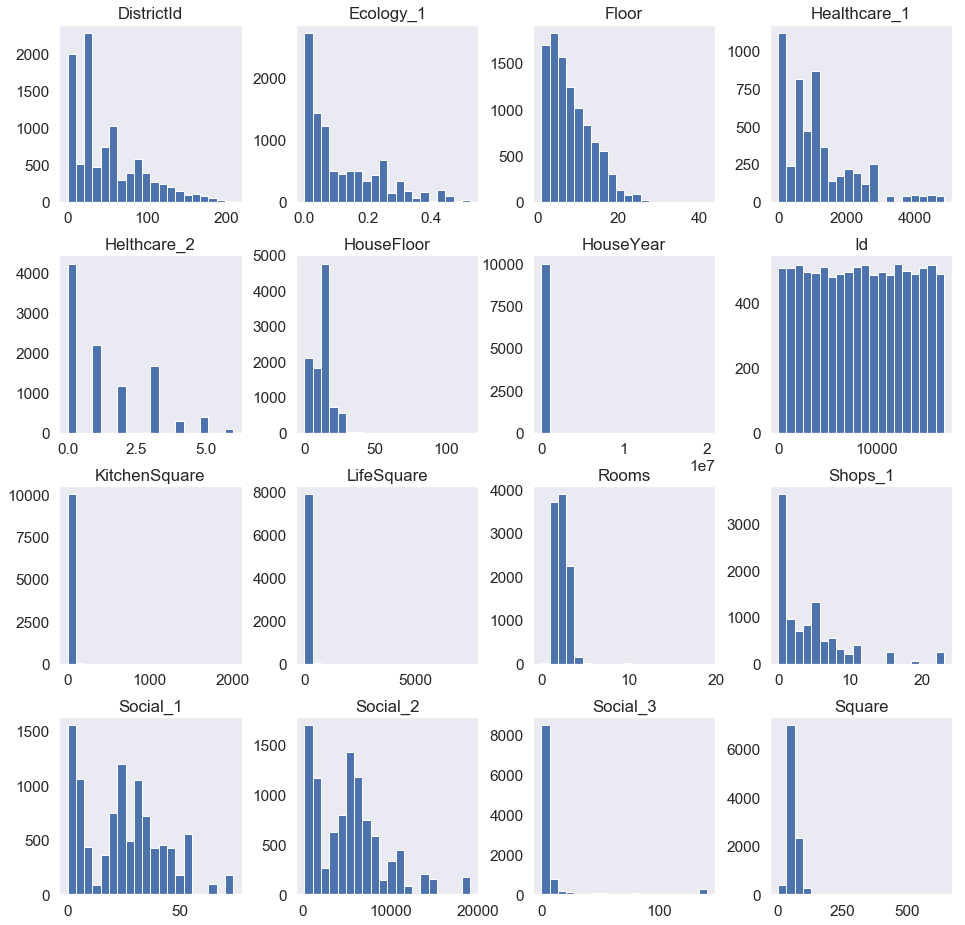

In [668]:
df_num_features.hist(figsize=(16,16),bins=20,grid=False);

### Матрица корреляций

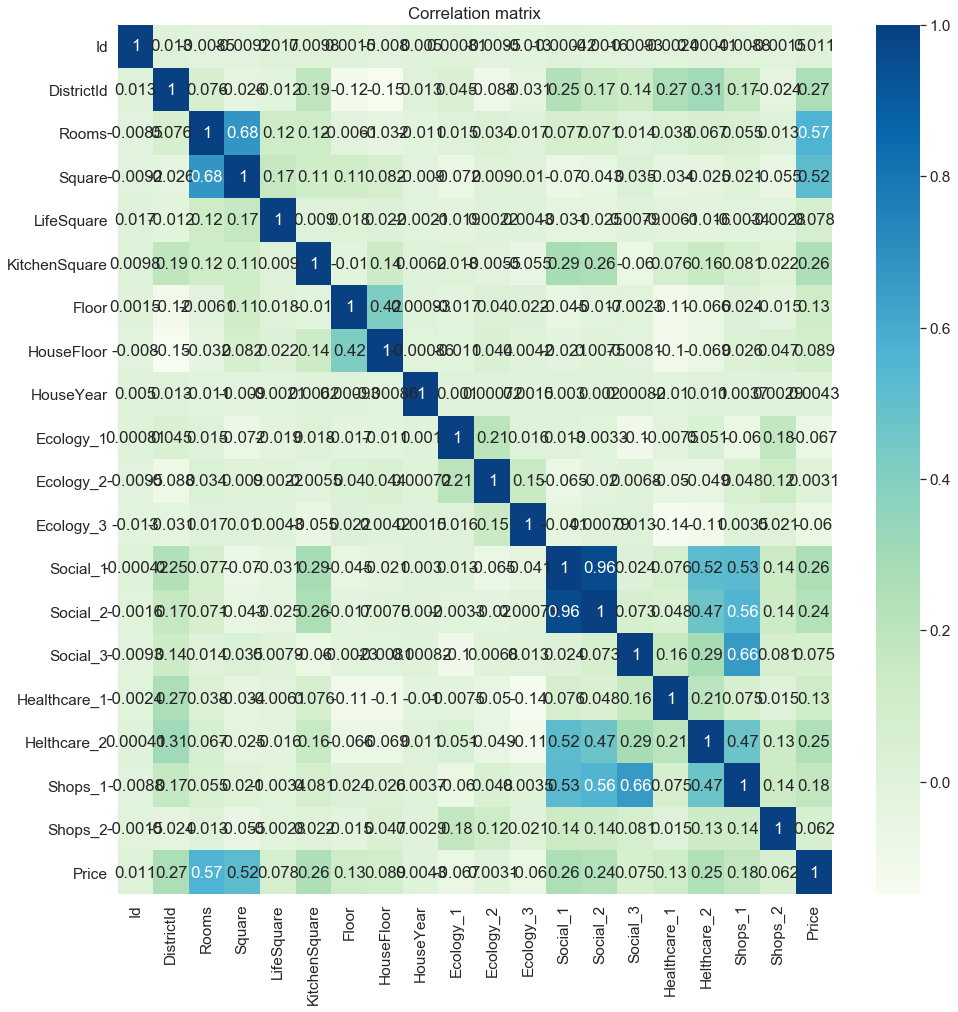

In [669]:
plt.figure(figsize=(16,16))

sns.set(font_scale=1.4)
sns.heatmap(df.corr(),cmap='GnBu',annot=True)

plt.title('Correlation matrix')
plt.show()

In [670]:
df.dtypes

Id               float64
DistrictId       float64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor            float64
HouseFloor       float64
HouseYear        float64
Ecology_1        float64
Ecology_2        float64
Ecology_3        float64
Social_1         float64
Social_2         float64
Social_3         float64
Healthcare_1     float64
Helthcare_2      float64
Shops_1          float64
Shops_2          float64
Price            float64
dtype: object

In [671]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038.0,35.0,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,2.0,2.0,33.0,7976.0,5.0,900.0,0.0,11.0,2.0,184966.930730
1,15053.0,41.0,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,2.0,2.0,46.0,10309.0,1.0,240.0,1.0,16.0,2.0,300009.450063
2,4765.0,53.0,2.0,44.947953,29.197612,0.0,8.0,12.0,1968.0,0.049637,2.0,2.0,34.0,7759.0,0.0,229.0,1.0,3.0,2.0,220925.908524
3,5809.0,58.0,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,2.0,2.0,23.0,5735.0,3.0,1084.0,0.0,5.0,2.0,175616.227217
4,10783.0,99.0,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,2.0,2.0,35.0,5776.0,1.0,2078.0,2.0,4.0,2.0,150226.531644


In [672]:
def evaluate_preds(true_values,pred_values):
    print('R2\t'+str(round(r2(true_values,pred_values),3)))
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=pred_values,y=true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [673]:
df['Price'].value_counts().head()

6.000000         2
179485.931037    1
456417.428803    1
149480.126085    1
245157.999097    1
Name: Price, dtype: int64

In [674]:
df=df.loc[df.Price>7].reset_index(drop=True)

In [675]:
df['Price'].value_counts(sort = True).tail()

503712.153979    1
136545.287962    1
487300.561351    1
176072.619971    1
217669.112875    1
Name: Price, dtype: int64

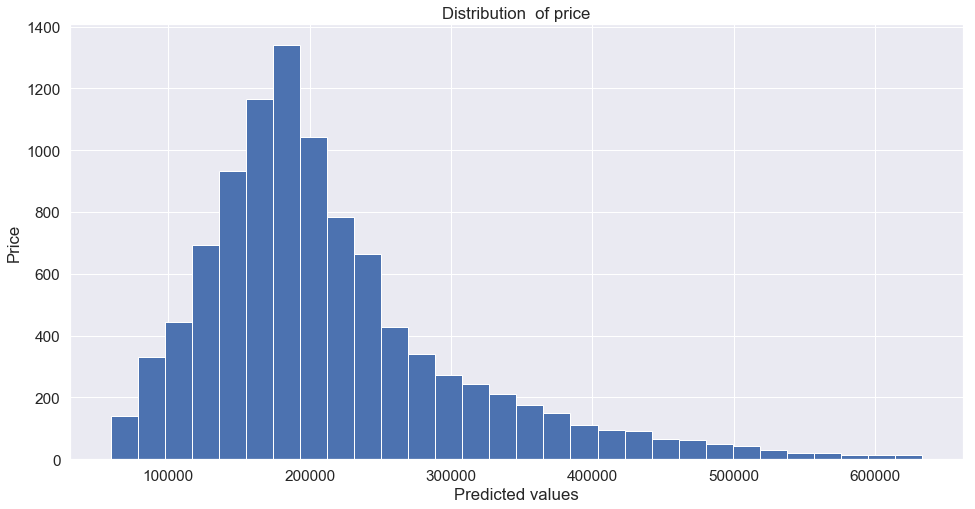

In [676]:
plt.figure(figsize=(16,8))
df.Price.hist(bins=30)
plt.xlabel('Predicted values')
plt.ylabel('Price')
plt.title('Distribution  of price')
plt.show()

# Отбор признаков

In [677]:
df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [678]:
df.Shops_2.value_counts()

2.0    9173
1.0     825
Name: Shops_2, dtype: int64

In [679]:
id_name = 'Id'
feature_names=['DistrictId','Rooms', 'Square', 'HouseFloor', 'Ecology_1','Floor',
               'Social_1', 'Helthcare_2', 'Shops_1']
target_name='Price'

In [680]:
df=df[feature_names+[target_name]]
df.head()

,DistrictId,Rooms,Square,HouseFloor,Ecology_1,Floor,Social_1,Helthcare_2,Shops_1,Price
0,35.0,2.0,47.981561,9.0,0.089040,7.0,33.0,0.0,11.0,184966.930730
1,41.0,3.0,65.683640,9.0,0.000070,7.0,46.0,1.0,16.0,300009.450063
2,53.0,2.0,44.947953,12.0,0.049637,8.0,34.0,1.0,3.0,220925.908524
3,58.0,2.0,53.352981,17.0,0.437885,8.0,23.0,0.0,5.0,175616.227217
4,99.0,1.0,39.649192,12.0,0.012339,11.0,35.0,2.0,4.0,150226.531644


In [681]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,2,2,11,2748,1,900.0,0,0,2
1,15856,74,2.0,69.263183,32.925087,1.0,6,1.0,1977,0.075779,2,2,6,1437,3,900.0,0,2,2
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,2,2,30,7538,87,4702.0,5,5,2
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,2,2,23,4583,3,900.0,3,3,2
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,2,2,2,629,1,900.0,0,0,1


In [682]:
test.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2          int64
Ecology_3          int64
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2            int64
dtype: object

In [683]:
test['DistrictId'] = test['DistrictId'].astype('float64')
test['DistrictId'].dtype

dtype('float64')

In [684]:
test['Floor'] = test['Floor'].astype('float64')
test['Floor'].dtype

dtype('float64')

In [685]:
test['Social_1'] = test['Social_1'].astype('float64')
test['Social_1'].dtype

dtype('float64')

In [686]:
test['Helthcare_2'] = test['Helthcare_2'].astype('float64')
test['Helthcare_2'].dtype

dtype('float64')

In [687]:
test['Shops_1'] = test['Shops_1'].astype('float64')
test['Shops_1'].dtype

dtype('float64')

In [688]:
test.dtypes

Id                 int64
DistrictId       float64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor            float64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2          int64
Ecology_3          int64
Social_1         float64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2      float64
Shops_1          float64
Shops_2            int64
dtype: object

# Стандартизация признаков

In [689]:
feature_names_for_stand=df[feature_names].select_dtypes(include='float64').columns.to_list()
feature_names_for_stand

['DistrictId',
 'Rooms',
 'Square',
 'HouseFloor',
 'Ecology_1',
 'Floor',
 'Social_1',
 'Helthcare_2',
 'Shops_1']

In [690]:
scaler=StandardScaler()
stand_features=scaler.fit_transform(df[feature_names_for_stand])

In [691]:
df[feature_names_for_stand]=pd.DataFrame(stand_features,columns=feature_names_for_stand)

In [692]:
df.head()

,DistrictId,Rooms,Square,HouseFloor,Ecology_1,Floor,Social_1,Helthcare_2,Shops_1,Price
0,-0.353391,0.138393,-0.395943,-0.532638,-0.250573,-0.291365,0.474016,-0.883538,1.408148,184966.930730
1,-0.215742,1.367214,0.444683,-0.532638,-0.998056,-0.291365,1.215508,-0.214021,2.448469,300009.450063
2,0.059557,0.138393,-0.540001,-0.089907,-0.581614,-0.100569,0.531054,-0.214021,-0.256366,220925.908524
3,0.174264,0.138393,-0.140868,0.647978,2.680269,-0.100569,-0.096362,-0.883538,0.159763,175616.227217
4,1.114867,-1.090428,-0.791625,-0.089907,-0.894978,0.471817,0.588092,0.455497,-0.048301,150226.531644


In [693]:
test_names_for_stand=test[feature_names].select_dtypes(include='float64').columns.to_list()
test_names_for_stand

['DistrictId',
 'Rooms',
 'Square',
 'HouseFloor',
 'Ecology_1',
 'Floor',
 'Social_1',
 'Helthcare_2',
 'Shops_1']

In [694]:
test_stand_features=scaler.transform(test[test_names_for_stand])

In [695]:
test[test_names_for_stand]=pd.DataFrame(test_stand_features,columns=test_names_for_stand)

In [696]:
test[test_names_for_stand].head()

,DistrictId,Rooms,Square,HouseFloor,Ecology_1,Floor,Social_1,Helthcare_2,Shops_1
0,0.174264,0.138393,-0.305665,0.205247,1.607508,-0.482160,-0.780815,-0.883538,-0.880558
1,0.541329,0.138393,0.614666,-1.713255,-0.361985,-0.482160,-1.066005,-0.883538,-0.464430
2,3.202547,-1.090428,-2.028737,-1.122947,-0.998644,-1.245343,0.302903,2.464048,0.159763
3,-0.078093,0.138393,0.794331,1.385864,-0.142758,2.570568,-0.096362,1.125014,-0.256366
4,-0.536923,-1.090428,-0.417523,0.647978,-0.392409,1.616591,-1.294156,-0.883538,-0.880558


In [697]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,0.174264,0.138393,-0.305665,33.432782,6.0,-0.482160,0.205247,1972,1.607508,2,2,-0.780815,2748,1,900.0,-0.883538,-0.880558,2
1,15856,0.541329,0.138393,0.614666,32.925087,1.0,-0.482160,-1.713255,1977,-0.361985,2,2,-1.066005,1437,3,900.0,-0.883538,-0.464430,2
2,5480,3.202547,-1.090428,-2.028737,15.948246,12.0,-1.245343,-1.122947,1909,-0.998644,2,2,0.302903,7538,87,4702.0,2.464048,0.159763,2
3,15664,-0.078093,0.138393,0.794331,51.940842,9.0,2.570568,1.385864,2007,-0.142758,2,2,-0.096362,4583,3,900.0,1.125014,-0.256366,2
4,14275,-0.536923,-1.090428,-0.417523,43.387569,1.0,1.616591,0.647978,2017,-0.392409,2,2,-1.294156,629,1,900.0,-0.883538,-0.880558,1


# Разбиение на test/train

In [698]:
X_train=df[feature_names]
y_train=df[target_name]

# Построение моделей и выбор лучшей

In [699]:
lr_model=LinearRegression()

In [700]:
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

R2	0.488


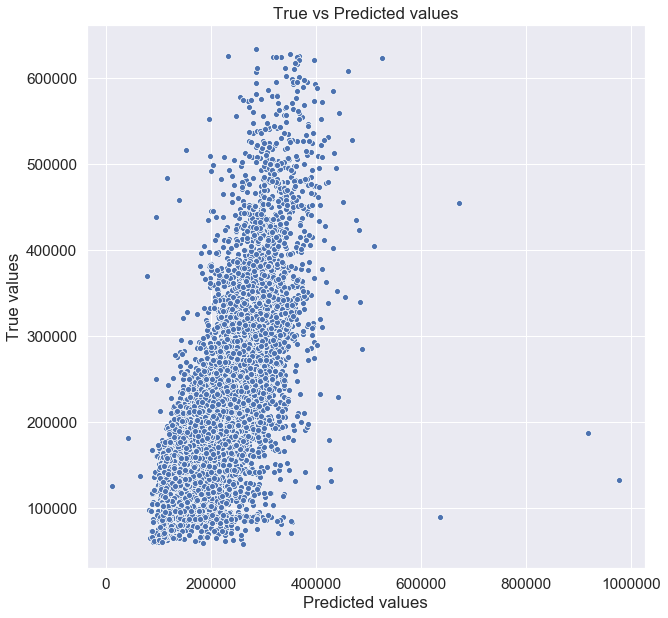

In [701]:
y_train_preds=lr_model.predict(X_train)
evaluate_preds(y_train,y_train_preds)

In [702]:
y_test_preds=lr_model.predict(test[test_names_for_stand])

## random forest

In [703]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

R2	0.945


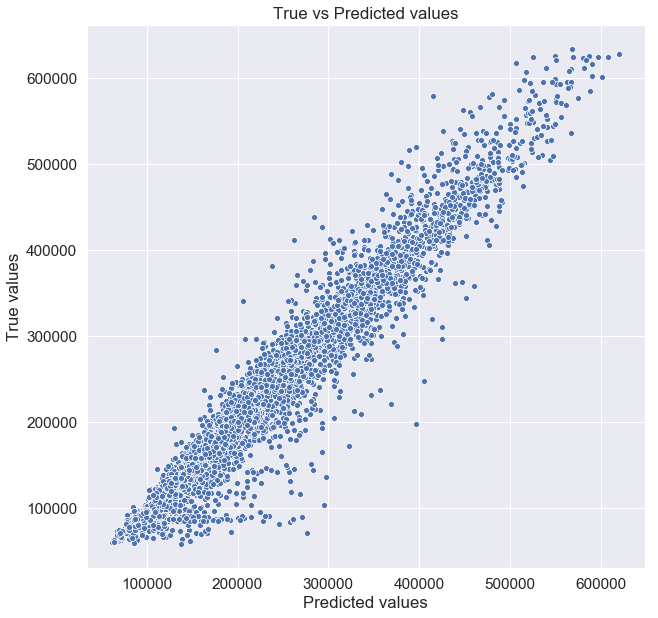

In [704]:
y_train_preds=rf_model.predict(X_train)
evaluate_preds(y_train,y_train_preds)

In [705]:
y_test_preds=rf_model.predict(test[test_names_for_stand])

In [706]:
fin_model=RandomForestRegressor(random_state=42)

In [708]:
params={'n_estimators':[80,150,300],
        'max_depth':[7,15,30]}
gs=GridSearchCV(fin_model,params,scoring='r2',cv=KFold(n_splits=3,random_state=42,shuffle=True),n_jobs=-1)
gs.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [80, 150, 300], 'max_depth': [7, 15, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [709]:
gs.best_params_

{'max_depth': 15, 'n_estimators': 300}

In [710]:
gs.best_score_

0.7063424538454272

# обучение и оценка финальной модели

In [719]:
final_model=RandomForestRegressor(n_estimators=300,max_depth=30,random_state=42)
final_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

R2	0.961


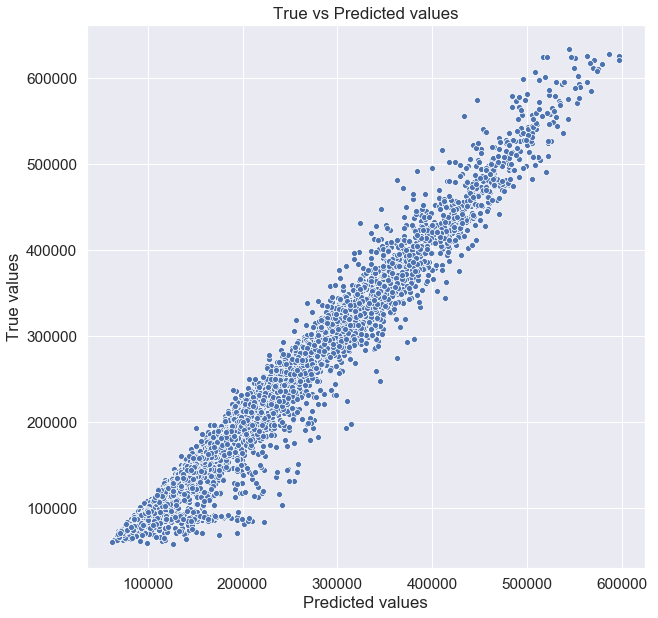

In [720]:
y_train_preds=final_model.predict(X_train)
evaluate_preds(y_train,y_train_preds)

In [721]:
y_test_preds=final_model.predict(test[test_names_for_stand])

In [722]:
feature_importances=pd.DataFrame(zip(X_train.columns,final_model.feature_importances_),columns=['feature_name','importance'])
feature_importances.sort_values(by='importance',ascending=False)

,feature_name,importance
2,Square,0.424550
6,Social_1,0.194064
0,DistrictId,0.086424
1,Rooms,0.082587
4,Ecology_1,0.063196
5,Floor,0.046540
3,HouseFloor,0.043682
8,Shops_1,0.037059
7,Helthcare_2,0.021896


In [723]:
test['Price']=final_model.predict(test[test_names_for_stand])
test[['Id','Price']].to_csv('Zubova_Ksenia_predictions.csv',index=False)